In [4]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

In [5]:
credit = pd.read_csv('/content/credits.csv')
titles = pd.read_csv('/content/titles.csv')

In [6]:
titles.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],NaN,tt0032455,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],NaN,tt0029583,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0032910,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,"['animation', 'drama', 'family']",['US'],NaN,tt0034492,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,PG,96,"['family', 'action']","['GB', 'US']",NaN,tt0043067,6.9,8229.0,10.698,6.5
5,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1949,G,68,"['fantasy', 'horror', 'animation', 'comedy', '...",['US'],NaN,tt0041094,6.9,15405.0,10.862,6.5
6,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],NaN,tt0042332,7.3,157099.0,144.284,7.0
7,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,63,"['animation', 'drama', 'family', 'fantasy']",['US'],NaN,tt0033563,7.2,129548.0,69.875,7.0
8,tm4623,The Three Caballeros,MOVIE,For Donald's birthday he receives a box with t...,1944,G,71,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0038166,6.3,13889.0,11.750,6.4
9,tm77826,The Reluctant Dragon,MOVIE,Humorist Robert Benchley attempts to find Walt...,1941,G,74,"['fantasy', 'animation', 'family', 'comedy']",['US'],NaN,tt0034091,6.8,3280.0,6.958,6.6


In [7]:
credit.head(10)

,person_id,id,name,character,role
0,23433,tm74391,Deems Taylor,Narrator - Narrative Introductions,ACTOR
1,5910,tm74391,Walt Disney,Mickey Mouse (segment 'The Sorcerer's Apprenti...,ACTOR
2,23436,tm74391,Julietta Novis,Soloist (segment 'Ave Maria') (singing voice),ACTOR
3,23434,tm74391,Leopold Stokowski,Himself - Conductor of The Philadelphia Orchestra,ACTOR
4,23441,tm74391,Paul Satterfield,NaN,DIRECTOR
5,23442,tm74391,Hamilton Luske,NaN,DIRECTOR
6,23443,tm74391,Jim Handley,NaN,DIRECTOR
7,6164,tm74391,Ford Beebe,NaN,DIRECTOR
8,23444,tm74391,T. Hee,NaN,DIRECTOR
9,23446,tm74391,Wilfred Jackson,NaN,DIRECTOR


In [8]:
pd.DataFrame(titles.count(), columns=["total"])

,total
id,1535
title,1535
type,1535
description,1529
release_year,1535
age_certification,1210
runtime,1535
genres,1535
production_countries,1535
seasons,415


In [9]:
pd.DataFrame(credit.count(), columns=["total"])

,total
person_id,26412
id,26412
name,26412
character,24769
role,26412


In [10]:
import random

def get_random_color():
    r1 = lambda: random.randint(0,255)
    return '#%02X%02X%02X' % (r1(),r1(),r1())


def get_histplot_central_tendency(df: dict, fields: list):
    for field in fields:
        f, (ax1) = plt.subplots(1, 1, figsize=(12, 6))
        v_dist_1 = df[field].values
        sns.histplot(v_dist_1, ax=ax1, color=get_random_color(), kde=True)

        mean=df[field].mean()
        median=df[field].median()
        mode=df[field].mode().values[0]

        ax1.axvline(mean, color='r', linestyle='--', label="Mean")
        ax1.axvline(median, color='g', linestyle='-', label="Mean")
        ax1.axvline(mode, color='b', linestyle='-', label="Mode")
        ax1.legend()
        #plt.grid()
        plt.plot(color="white", lw=3)
        plt.suptitle(f"{field} - Histogram analysis", fontsize=18)
        
def bar_plot_data(df: dict, field: str, subtitle: str, figsize=(5, 4), top_filter=15, df_filter=None):
    fig, ax1 = plt.subplots(figsize=figsize, dpi=100)
    
    for spline in ['top', 'right', 'left']:
        ax1.spines[spline].set_visible(False)
          
    if df_filter is None:
        df_filter = df[field].value_counts().rename_axis(field).reset_index(name='count')
    else:
        df_filter = df
        
    if top_filter:
        df_filter = df_filter.head(top_filter)
        
    sns.barplot(data=df_filter, palette='cool', x='count', y=field)
    ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
    ax1.set_xlabel(f'count', fontsize=13, color = '#333F4B')
    ax1.set_ylabel(f'{field}', fontsize=13, color = '#333F4B')

    plt.plot(color="white", lw=3)
    fig.suptitle(subtitle, fontsize=18)
    plt.show()
    
def bar_count_plot(df: dict, title: str, color='Red'):
    fig, ax1 = plt.subplots(figsize=(25, 6), dpi=100)
    for spline in ['top', 'right', 'left']:
        ax1.spines[spline].set_visible(False)
        
    sns.barplot(data=df, palette='cool', x=df.index, y=df['release_year']) 
    ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
    ax1.set_xlabel(f'Release year', fontsize=13, color = '#333F4B')
    ax1.set_ylabel(f'', fontsize=13, color = '#333F4B')
    
    plt.xticks(rotation=90)
    plt.gca().invert_xaxis()
    plt.plot(color="white", lw=3)
    fig.suptitle(title, fontsize=18)
    plt.show()

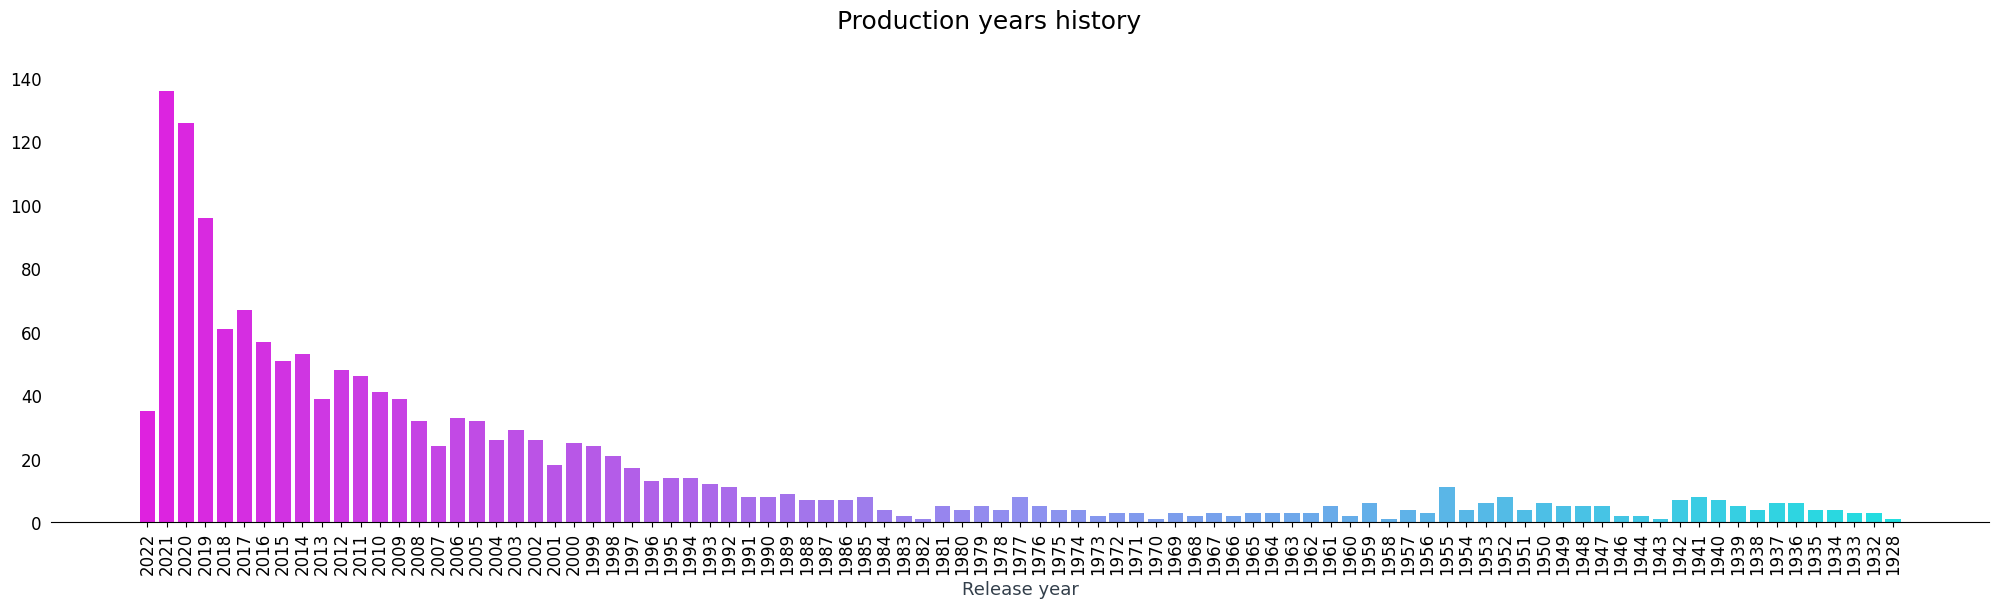

In [11]:
release_year = pd.DataFrame(titles['release_year'].value_counts())
bar_count_plot(release_year, 'Production years history')

In [12]:
titles['production_countries'] = titles['production_countries'].replace('[]', 'Unknown')

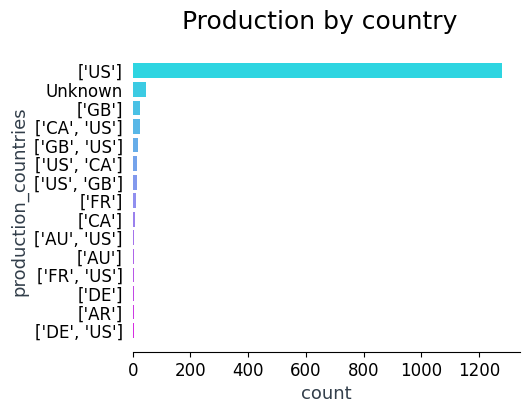

In [13]:
bar_plot_data(titles, "production_countries", "Production by country")

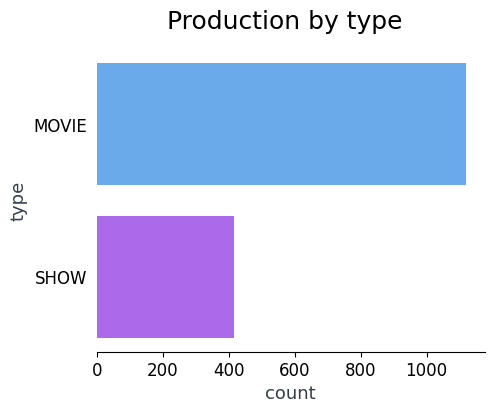

In [14]:
bar_plot_data(titles, "type", "Production by type")

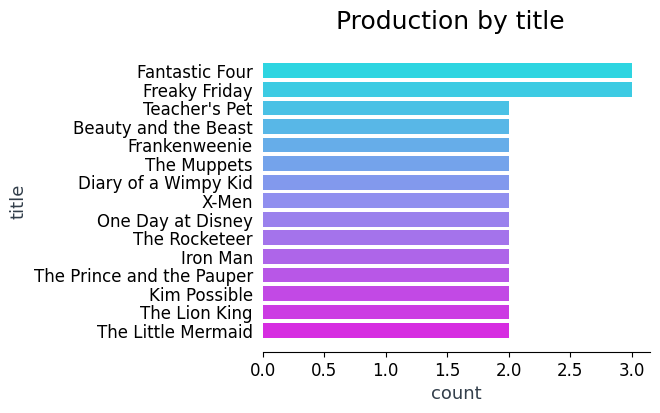

In [15]:
bar_plot_data(titles, "title", "Production by title")

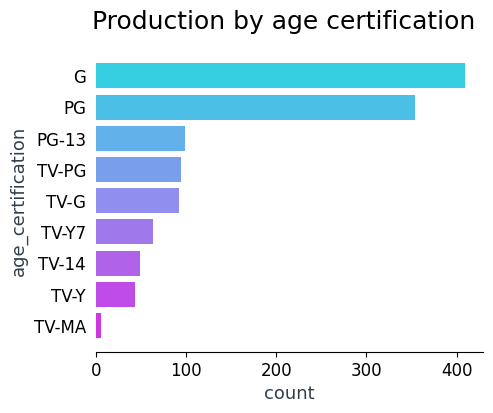

In [16]:
bar_plot_data(titles, "age_certification", "Production by age certification")

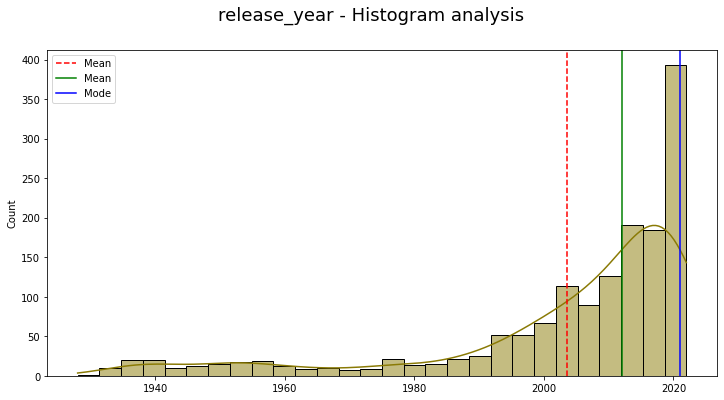

In [17]:
get_histplot_central_tendency(titles, ['release_year'])

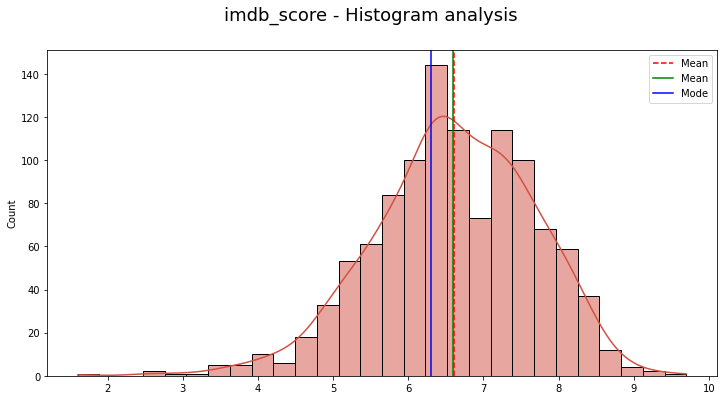

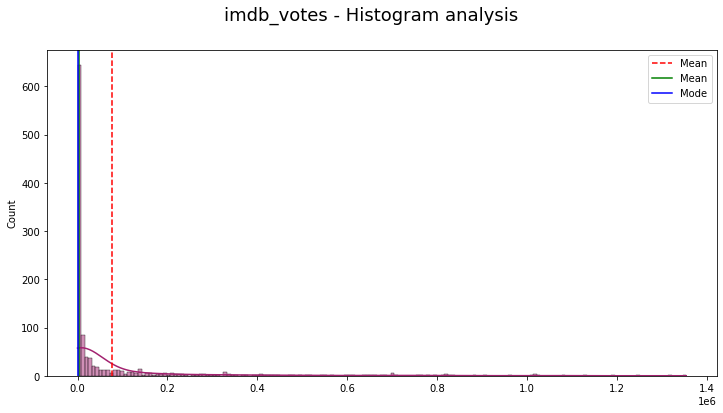

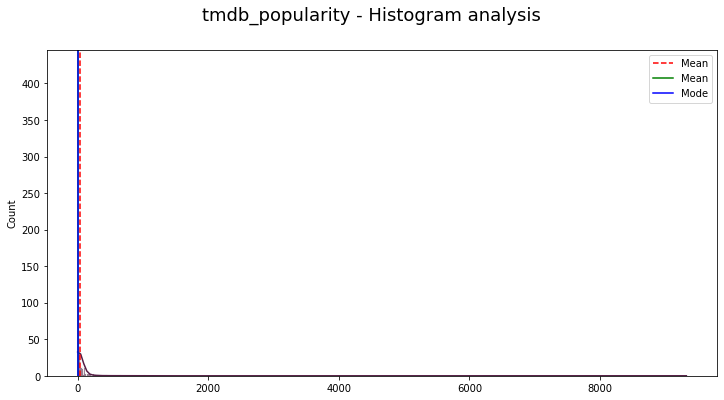

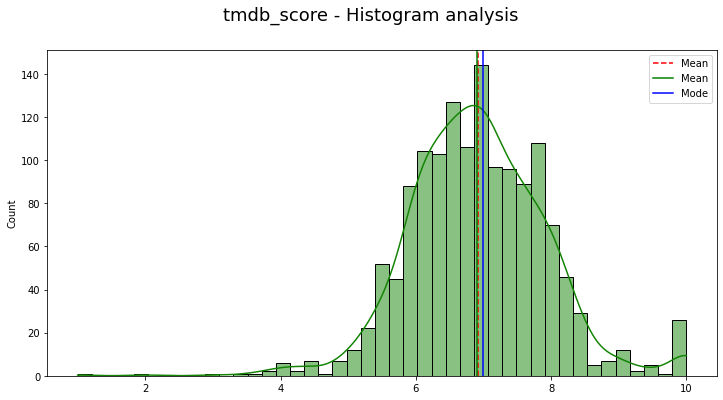

In [18]:
get_histplot_central_tendency(titles, ['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'])

In [19]:
total_genre = dict()
for current in titles['genres']:
    current = current.replace("'", "").replace('"', "")
    current = list(current.replace('[', '').replace(']', '').split(","))
    for genre in current:
        if genre not in total_genre:
            total_genre[genre] = 0
        total_genre[genre] += 1
     
    
df_genre = {'genre': [], 'count': []}
total_genre = {k: v for k, v in sorted(total_genre.items(), reverse=True, key=lambda item: item[1])}
for i, j in total_genre.items():
    df_genre['genre'].append(i)
    df_genre['count'].append(j)
    
df_genre = pd.DataFrame.from_dict(df_genre)
df_genre.head(15)

,genre,count
0,family,691
1,comedy,350
2,documentation,301
3,comedy,299
4,animation,250
5,drama,242
6,fantasy,238
7,animation,236
8,action,212
9,fantasy,154


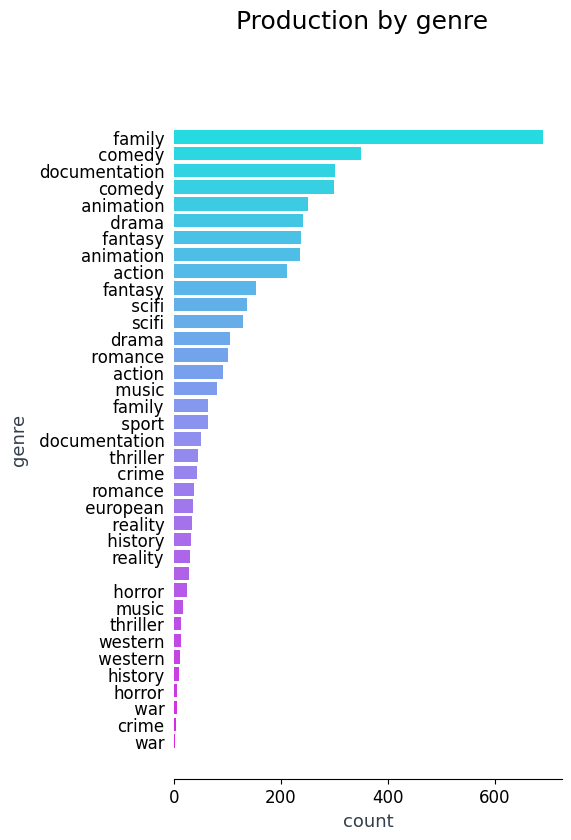

In [20]:
def genre_plot(df_genre):
    fig, ax1 = plt.subplots(figsize=(5, 9), dpi=100)
    for spline in ['top', 'right', 'left']:
        ax1.spines[spline].set_visible(False)
    sns.barplot(data=df_genre, palette='cool', x='count', y='genre')
    ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
    ax1.set_xlabel(f'count', fontsize=13, color = '#333F4B')
    ax1.set_ylabel(f'genre', fontsize=13, color = '#333F4B')

    plt.plot(color="white", lw=3)
    fig.suptitle("Production by genre", fontsize=18)
    plt.show()

genre_plot(df_genre)

In [21]:
movie_description = titles['title']
movie_imdb = titles['imdb_score']

In [22]:
movie_description['plot'] = movie_description.astype(str) + "\n" + movie_imdb.astype(str)
movies_df = movie_description

In [23]:
titles.head(1)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],NaN,tt0032455,7.7,94681.0,57.751,7.4


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

features = ['title', 'type', 'genres', 'description', 'imdb_score', 'tmdb_popularity', 'tmdb_score']

def pre_processor_clean(titles):
    movies_title = titles.copy()
    for feature in features:
        movies_title[feature] = movies_title[feature].fillna('')
    return movies_title

def combine_features_string(current):
    rows = ""
    for feature in ['title', 'type', 'genres', 'description', 
                    'imdb_score', 'tmdb_popularity', 'tmdb_score']:
        rows += f'{current[feature]}\n '
    return rows
    

movies_title = pre_processor_clean(titles)
movies_title['features'] = movies_title.apply(combine_features_string, axis=1)
movies_title['features'].head(10)

0    Fantasia\n MOVIE\n ['animation', 'family', 'mu...
1    Snow White and the Seven Dwarfs\n MOVIE\n ['fa...
2    Pinocchio\n MOVIE\n ['animation', 'comedy', 'f...
3    Bambi\n MOVIE\n ['animation', 'drama', 'family...
4    Treasure Island\n MOVIE\n ['family', 'action']...
5    The Adventures of Ichabod and Mr. Toad\n MOVIE...
6    Cinderella\n MOVIE\n ['fantasy', 'animation', ...
7    Dumbo\n MOVIE\n ['animation', 'drama', 'family...
8    The Three Caballeros\n MOVIE\n ['animation', '...
9    The Reluctant Dragon\n MOVIE\n ['fantasy', 'an...
Name: features, dtype: object

In [25]:
vectorizer = CountVectorizer()
matrix_transform = vectorizer.fit_transform(movies_title["features"])
cosine_similiraty_rm = cosine_similarity(matrix_transform)

In [26]:
def get_index_using_title(title, movies):
    return movies[movies["title"] == title].index.values[0]

def select_movie(movies, movie, cosine_similiraty_rm, number_of_recommendations):
    similar_movies = list(enumerate(cosine_similiraty_rm[get_index_using_title(movies, movie)]))
    sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse=True)[1:]
    sorted_similar_movies = sorted_similar_movies[0: number_of_recommendations]
    
    df_recommender = {"_id": [], "title": [], "description": [], "confidence": []}
    for i, similiraty_movie in enumerate(sorted_similar_movies):
        index_movie, confidence = similiraty_movie[0], similiraty_movie[1]
        filter_movie = movie[movie.index == index_movie].values[0]
        df_recommender["_id"].append(index_movie)
        df_recommender["title"].append(filter_movie[1])
        df_recommender["description"].append(filter_movie[3]) 
        df_recommender["confidence"].append(confidence)
    
    return pd.DataFrame(df_recommender)

In [27]:
cm = sns.light_palette("green", as_cmap=True)
movies_similiraty = select_movie("Cinderella", movies_title, cosine_similiraty_rm, 10)
movies_similiraty

,_id,title,description,confidence
0,611,Cinderella II: Dreams Come True,"As a newly crowned princess, Cinderella quickl...",0.555230
1,513,Confessions of a Teenage Drama Queen,When the teenager Lola Steppe moves with her m...,0.546898
2,1160,Mulan,When the Emperor of China issues a decree that...,0.545880
3,845,Tinker Bell and the Legend of the NeverBeast,An ancient myth of a massive creature sparks t...,0.527843
4,65,Ye Olden Days,The princess is to wed the Prince against her ...,0.523949
5,937,America's National Parks,An epic journey from the geysers of Yellowston...,0.515814
6,75,Mr. Duck Steps Out,Donald visits the house of his new love intere...,0.509615
7,310,Cinderella,Cinderella chafes under the cruelty of her wic...,0.508216
8,621,Cinderella III: A Twist in Time,When Lady Tremaine steals the Fairy Godmother'...,0.507972
9,1056,Life-Size 2,Grace Manning is in the middle of her quarter-...,0.507972


AttributeError: ignored

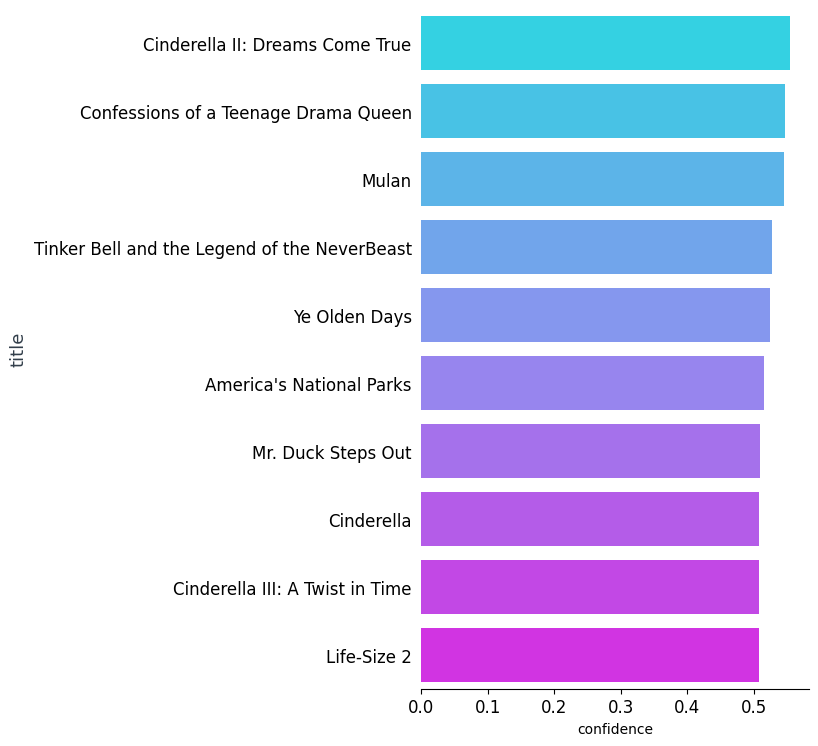

In [28]:
def confidence_plot(movies_similirary):
    fig, ax1 = plt.subplots(figsize=(5, 9), dpi=100)
    for spline in ['top', 'right', 'left']:
        ax1.spines[spline].set_visible(False)
        
    sns.barplot(data=movies_similiraty, palette='cool', x='confidence', y='title')
    ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
    #ax1.set_xlabel(f'confidence', fontsize=13, color = '#333F4B')
    ax1.set_ylabel(f'title', fontsize=13, color = '#333F4B')
    ax1.bar_label(ax1.containers[0], fontsize=13)
    plt.plot(color="white", lw=3)
    fig.suptitle("Recommendation movies", fontsize=18)
    plt.show()

confidence_plot(movies_similiraty)